In [1]:
import numpy as np
import lbg_forecast.nz as nz
import matplotlib.pyplot as plt
import scipy as sc

In [6]:
def plot_nzs(axes, nzs, **kwargs):
    ndropouts=3
    bins = np.arange(0, 7, 0.1)
    colours = ['blue', 'red', 'green']
    labels = ['u-dropouts', "g-dropouts", "r-dropouts"]
    for drop in range(ndropouts):

        values = []
        x = []
        for ind in range(nzs.shape[0]):
            hist = axes.hist(nzs[ind][drop], density=True, bins=bins, alpha = 0.001, color=colours[drop])
            values.append(hist[0])
            x.append(hist[1])

        values = np.hstack((np.array(values)))
        x = np.array(x)
        x = np.hstack(((x+0.05)[:,:-1]))


        bin_means, bin_edges, binnumber = sc.stats.binned_statistic(x, values, 'mean', bins=bins)
        bin_std, bin_edges, binnumber = sc.stats.binned_statistic(x, values, 'std', bins=bins)
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2

        #axes.errorbar(bin_centers, bin_means, bin_std, alpha=0.5, ms=10, fmt="o", elinewidth=2, capsize=3, capthick=2, lw=2, color=colours[drop], label=labels[drop])
        axes.fill_between(bin_centers, bin_means-bin_std, bin_means+bin_std, alpha=0.25, color=colours[drop])
        axes.plot(bin_centers, bin_means, color=colours[drop], label=labels[drop], **kwargs)

    plt.legend(fontsize=24)
    plt.xlabel("redshift z", fontsize=24)
    plt.ylabel("p(z|cut, population, sps model ...)", fontsize=24)
    plt.tick_params('x', labelsize=24)
    plt.tick_params('y', labelsize=24)
    plt.ylim(0, 2.5)

In [2]:
nzs_mean = np.load("nz_samples/nz_mean.npy", allow_pickle=True)
nzs = np.load("nz_samples/nz_no_mean.npy", allow_pickle=True)

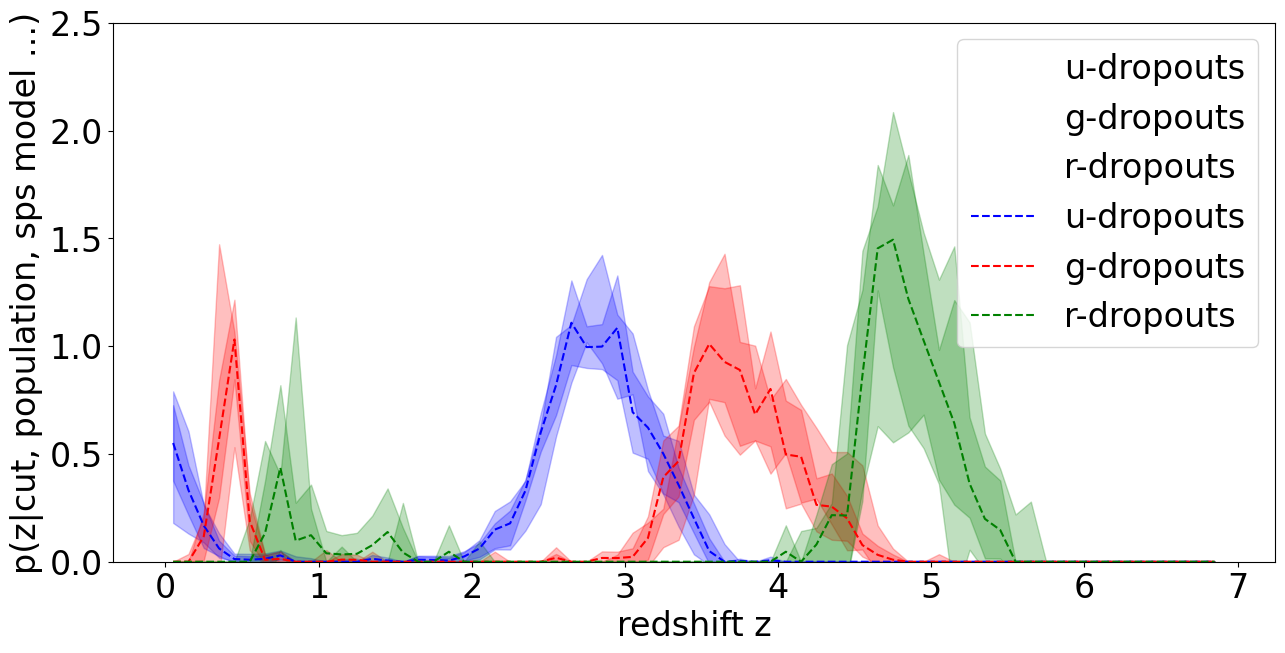

In [8]:
fig1, axes = plt.subplots(1, 1, figsize=(15,7), sharex=False, sharey=False)
plot_nzs(axes, nzs, ls='')
plot_nzs(axes, nzs_mean, ls='--')